In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [3]:
train_set = pd.read_csv('..\dataset\spaceship-titanic\\train.csv')
test_set = pd.read_csv('..\dataset\spaceship-titanic\\test.csv')
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
test_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


是否运输

In [8]:
Transported_F = 0;
Transported_T = 0;
Transported = train_set['Transported']
for i in Transported:
    if i == False:
        Transported_F = Transported_F + 1;
    elif i == True:
        Transported_T = Transported_T + 1;
print(Transported_T,Transported_F)
Transported = list(Transported)

4378 4315


Text(False, 4315, '4315')

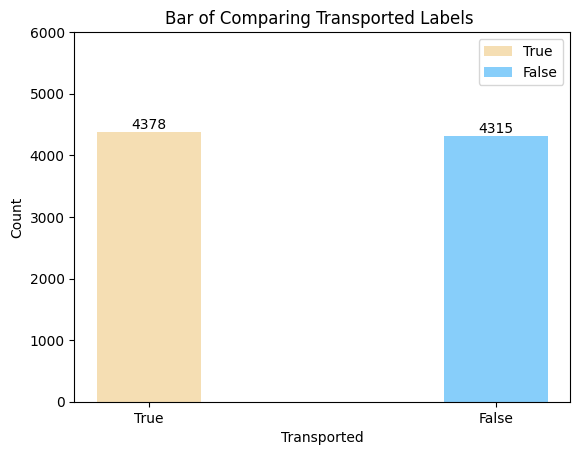

In [9]:
Transported_bar_x = ["True", "False"]
Transported_bar_y = [Transported_T, Transported_F]

#Transported_bar = plt.bar(Transported_bar_x,Transported_bar_y,width=0.3,color=['#F5DEB3', '#87CEFA'])#'#F5DEB3', '#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3'
Transported_bar_T = plt.bar("True", Transported_T, width=0.3, color=['#F5DEB3'], label = "True")
Transported_bar_F = plt.bar("False", Transported_F, width=0.3, color=['#87CEFA'], label = "False")
plt.title("Bar of Comparing Transported Labels ")
plt.xlabel('Transported')
plt.ylabel('Count')
plt.yticks(range(0,7000,1000))
plt.legend()

plt.text("True", Transported_T, Transported_T, ha='center', va='bottom')
plt.text("False", Transported_F, Transported_F, ha='center', va='bottom')


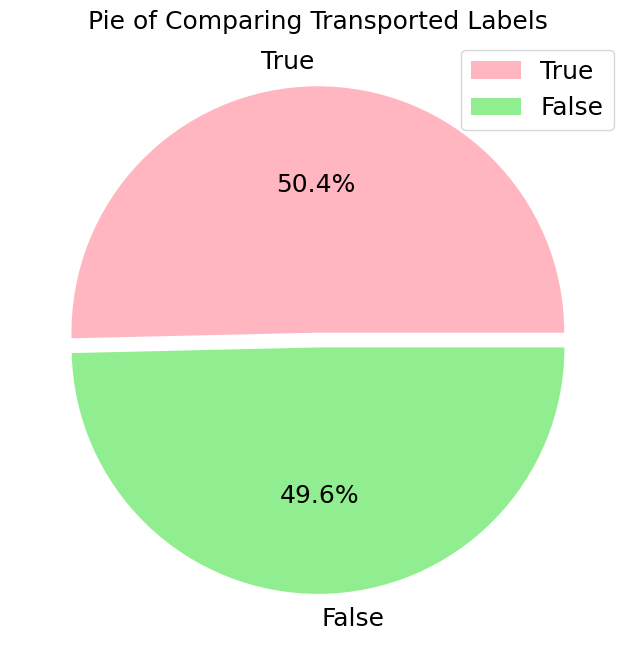

In [10]:
plt.figure(figsize=(8, 8))

Transported_labels = ['True', 'False']
Transported_explode = [0.05, 0.01]# 设置每块区域离圆心的距离，这里True区域凸出一点点
Transported_values = [Transported_T, Transported_F]
Transported_colors = ['#FFB6C1', '#90EE90']
 
_, l_text, p_text = plt.pie(Transported_values, explode=Transported_explode, labels=Transported_labels, autopct='%1.1f%%', colors=Transported_colors)
 
# 设置标签字体大小
for t in l_text:
    t.set_size(18)
# 设置数值字体大小
for t in p_text:
    t.set_size(18)
 
plt.title(u'Pie of Comparing Transported Labels', fontsize=18)
plt.legend(fontsize=18)

是否休眠

In [11]:
CryoSleep_F = 0;
CryoSleep_T = 0;
CryoSleep_N = 0;
CryoSleep = train_set['CryoSleep']
for i in CryoSleep:
    if i == False:
        CryoSleep_F = CryoSleep_F + 1;
    elif i == True:
        CryoSleep_T = CryoSleep_T + 1;
    else:
        CryoSleep_N = CryoSleep_N + 1;
print(CryoSleep_T, CryoSleep_F, CryoSleep_N)

CryoSleep_Transported_F = 0;
CryoSleep_Transported_T = 0;
CryoSleep_Transported_N = 0;
CryoSleep = list(CryoSleep)
for i in range(0,8693):
    if CryoSleep[i] == False:
        if Transported[i] == True:
            CryoSleep_Transported_F = CryoSleep_Transported_F + 1;
    elif CryoSleep[i] == True:
        if Transported[i] == True:
            CryoSleep_Transported_T = CryoSleep_Transported_T + 1;
    else:
        if Transported[i] == True:
            CryoSleep_Transported_N = CryoSleep_Transported_N + 1;
print(CryoSleep_Transported_T, CryoSleep_Transported_F, CryoSleep_Transported_N)

3037 5439 217
2483 1789 106


Text(NaN, 106, '106')

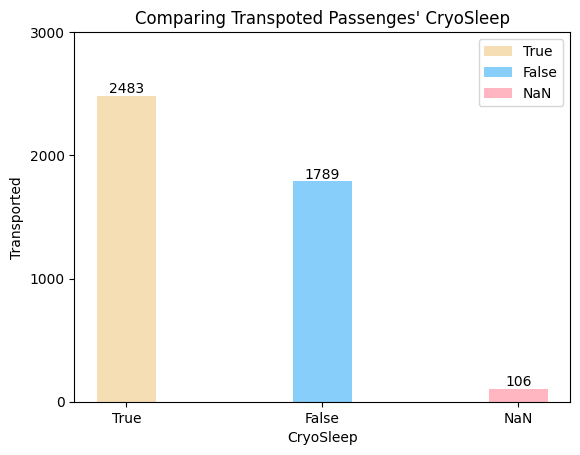

In [12]:
#'#F5DEB3', '#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3'
CryoSleep_Transported_bar_T = plt.bar("True", CryoSleep_Transported_T, width=0.3, color=['#F5DEB3'], label = "True")
CryoSleep_Transported_bar_F = plt.bar("False", CryoSleep_Transported_F, width=0.3, color=['#87CEFA'], label = "False")
CryoSleep_Transported_bar_N = plt.bar("NaN", CryoSleep_Transported_N, width=0.3, color=['#FFB6C1'], label = "NaN")
plt.title("Comparing Transpoted Passenges' CryoSleep")
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.yticks(range(0,4000,1000))
plt.legend()

plt.text("True", CryoSleep_Transported_T, CryoSleep_Transported_T, ha='center', va='bottom')
plt.text("False", CryoSleep_Transported_F, CryoSleep_Transported_F, ha='center', va='bottom')
plt.text("NaN", CryoSleep_Transported_N, CryoSleep_Transported_N, ha='center', va='bottom')

Text(NaN, 217, '217')

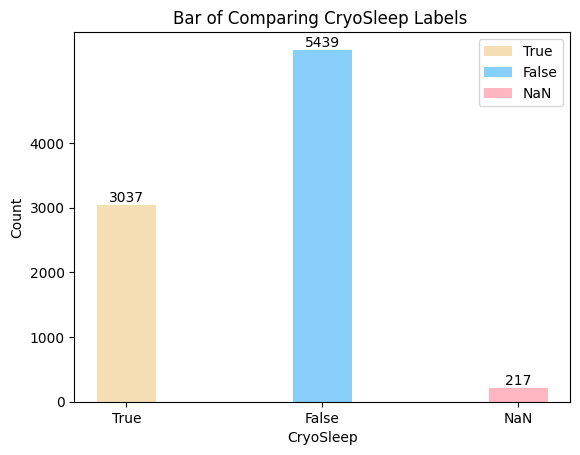

In [13]:
CryoSleep_bar_T = plt.bar("True", CryoSleep_T, width=0.3, color=['#F5DEB3'], label = "True")
CryoSleep_bar_F = plt.bar("False", CryoSleep_F, width=0.3, color=['#87CEFA'], label = "False")
CryoSleep_bar_N = plt.bar("NaN", CryoSleep_N, width=0.3, color=['#FFB6C1'], label = "NaN")
plt.title("Bar of Comparing CryoSleep Labels ")
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.yticks(range(0,5000,1000))
plt.legend()

plt.text("True", CryoSleep_T, CryoSleep_T, ha='center', va='bottom')
plt.text("False", CryoSleep_F, CryoSleep_F, ha='center', va='bottom')
plt.text("NaN", CryoSleep_N, CryoSleep_N, ha='center', va='bottom')

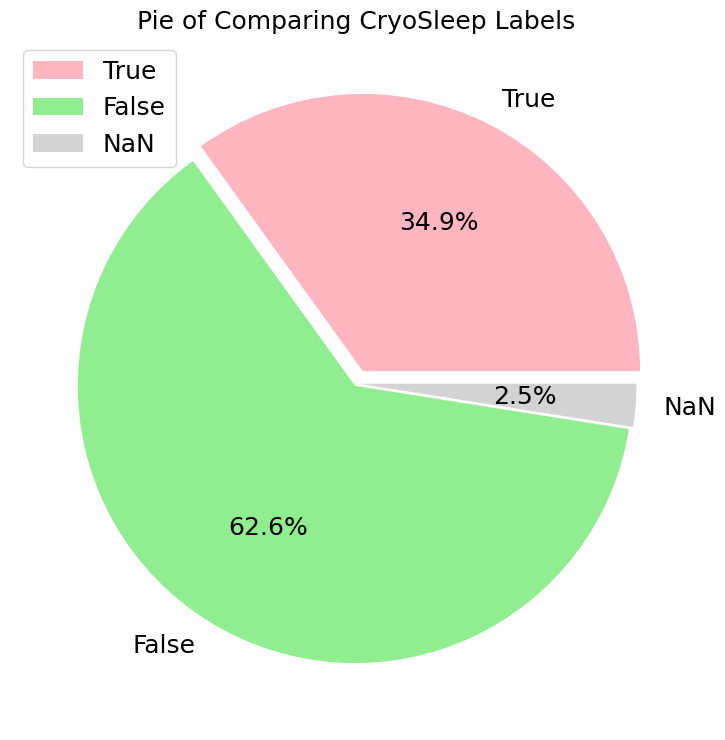

In [14]:
plt.figure(figsize=(9,9))

CryoSleep_labels = ['True', 'False', 'NaN']
CryoSleep_explode = [0.05, 0.01, 0.01]# 设置每块区域离圆心的距离，这里True区域凸出一点点
CryoSleep_values = [CryoSleep_T, CryoSleep_F, CryoSleep_N]
CryoSleep_colors = ['#FFB6C1', '#90EE90', '#D3D3D3']
 
_, l_text, p_text = plt.pie(CryoSleep_values, explode=CryoSleep_explode, labels=CryoSleep_labels, autopct='%1.1f%%', colors=CryoSleep_colors)
 
# 设置标签字体大小
for t in l_text:
    t.set_size(18)
# 设置数值字体大小
for t in p_text:
    t.set_size(18)
 
plt.title(u'Pie of Comparing CryoSleep Labels', fontsize=18)
plt.legend(fontsize=18)

是否是VIP

In [15]:
VIP_F = 0;
VIP_T = 0;
VIP_N = 0;
VIP = train_set['VIP']
for i in VIP:
    if i == False:
        VIP_F = VIP_F + 1;
    elif i == True:
        VIP_T = VIP_T + 1;
    else:
        VIP_N = VIP_N + 1;
print(VIP_T, VIP_F, VIP_N)

VIP_Transpoted_F = 0;
VIP_Transpoted_T = 0;
VIP_Transpoted_N = 0;
VIP = list(VIP)
for i in range(0,8693):
    if VIP[i] == False:
        if Transported[i] == True:
            VIP_Transpoted_F = VIP_Transpoted_F + 1;
    elif VIP[i] == True:
        if Transported[i] == True:
            VIP_Transpoted_T = VIP_Transpoted_T + 1;
    else:
        if Transported[i] == True:
            VIP_Transpoted_N = VIP_Transpoted_N + 1;
print(VIP_Transpoted_T, VIP_Transpoted_F, VIP_Transpoted_N)

199 8291 203
76 4198 104


Text(NaN, 0.512, '0.512')

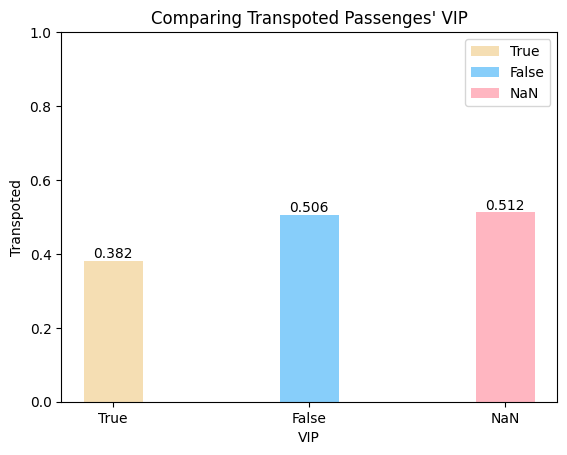

In [16]:
#'#F5DEB3', '#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3'
VIP_Transpoted_bar_T = plt.bar("True", np.round(VIP_Transpoted_T/VIP_T,3), width=0.3, color=['#F5DEB3'], label = "True")
VIP_Transpoted_bar_F = plt.bar("False", np.round(VIP_Transpoted_F/VIP_F,3), width=0.3, color=['#87CEFA'], label = "False")
VIP_Transpoted_bar_N = plt.bar("NaN", np.round(VIP_Transpoted_N/VIP_N,3), width=0.3, color=['#FFB6C1'], label = "NaN")
plt.title("Comparing Transpoted Passenges' VIP")
plt.xlabel('VIP')
plt.ylabel('Transpoted')
plt.ylim(0,1)
plt.legend()

plt.text("True", np.round(VIP_Transpoted_T/VIP_T,3), np.round(VIP_Transpoted_T/VIP_T,3), ha='center', va='bottom')
plt.text("False", np.round(VIP_Transpoted_F/VIP_F,3), np.round(VIP_Transpoted_F/VIP_F,3), ha='center', va='bottom')
plt.text("NaN", np.round(VIP_Transpoted_N/VIP_N,3), np.round(VIP_Transpoted_N/VIP_N,3), ha='center', va='bottom')

Text(NaN, 203, '203')

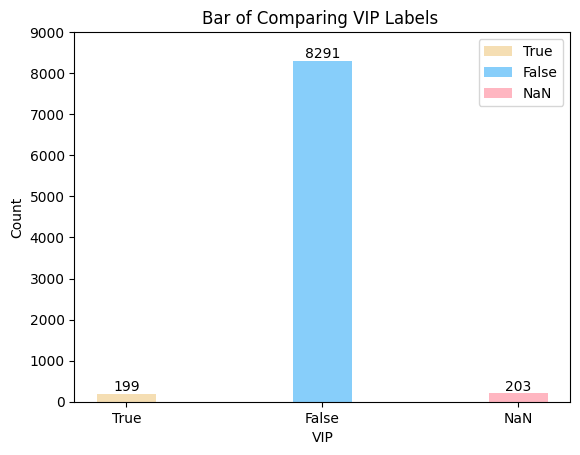

In [17]:
VIP_bar_T = plt.bar("True", VIP_T, width=0.3, color=['#F5DEB3'], label = "True")
VIP_bar_F = plt.bar("False", VIP_F, width=0.3, color=['#87CEFA'], label = "False")
VIP_bar_N = plt.bar("NaN", VIP_N, width=0.3, color=['#FFB6C1'], label = "NaN")
plt.title("Bar of Comparing VIP Labels ")
plt.xlabel('VIP')
plt.ylabel('Count')
plt.yticks(range(0,10000,1000))
plt.legend()

plt.text("True", VIP_T, VIP_T, ha='center', va='bottom')
plt.text("False", VIP_F, VIP_F, ha='center', va='bottom')
plt.text("NaN", VIP_N, VIP_N, ha='center', va='bottom')

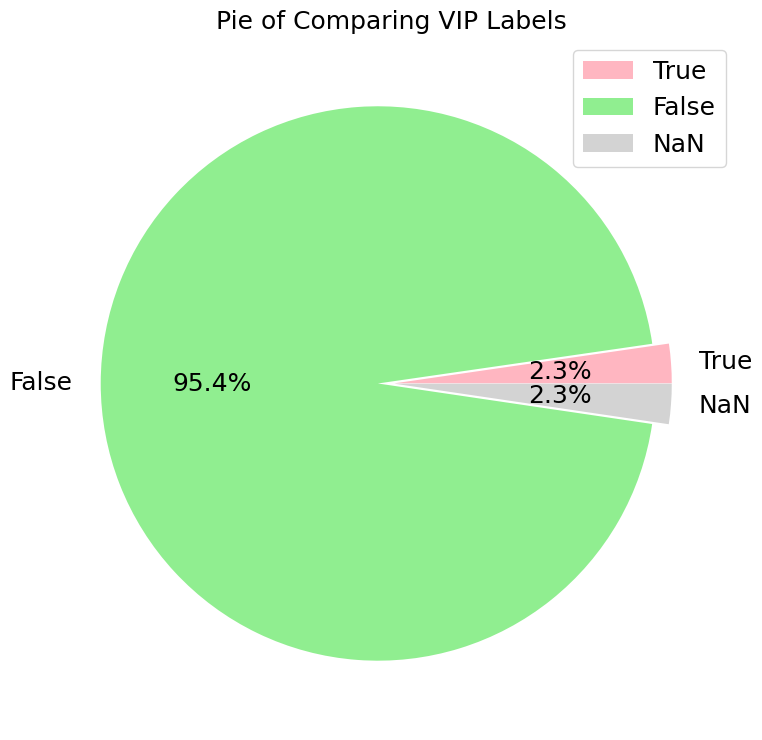

In [18]:
plt.figure(figsize=(9,9))

VIP_labels = ['True', 'False', 'NaN']
VIP_explode = [0.01, 0.05, 0.01]# 设置每块区域离圆心的距离，这里True区域凸出一点点
VIP_values = [VIP_T, VIP_F, VIP_N]
VIP_colors = ['#FFB6C1', '#90EE90', '#D3D3D3']
 
_, l_text, p_text = plt.pie(VIP_values, explode=VIP_explode, labels=VIP_labels, autopct='%1.1f%%', colors=VIP_colors)
 
# 设置标签字体大小
for t in l_text:
    t.set_size(18)
# 设置数值字体大小
for t in p_text:
    t.set_size(18)
 
plt.title(u'Pie of Comparing VIP Labels', fontsize=18)
plt.legend(fontsize=18)

家园

In [19]:
HomePlanet_Europa = 0;
HomePlanet_Earth = 0;
HomePlanet_N = 0;
HomePlanet_Mars = 0;
HomePlanet = train_set['HomePlanet']
for i in HomePlanet:
    if i == "Europa":
        HomePlanet_Europa = HomePlanet_Europa + 1;
    elif i == "Earth":
        HomePlanet_Earth = HomePlanet_Earth + 1;
    elif i == "Mars":
        HomePlanet_Mars = HomePlanet_Mars + 1
    else:
        HomePlanet_N = HomePlanet_N + 1;
print(HomePlanet_Europa, HomePlanet_Earth, HomePlanet_Mars, HomePlanet_N)

HomePlanet_Transported_Europa = 0;
HomePlanet_Transported_Earth = 0;
HomePlanet_Transported_N = 0;
HomePlanet_Transported_Mars = 0;
HomePlanet = list(HomePlanet)

for i in range(0,8693):
    if HomePlanet[i] == "Europa":
        if Transported[i] == True:
            HomePlanet_Transported_Europa = HomePlanet_Transported_Europa + 1;
    elif HomePlanet[i] == "Earth":
        if Transported[i] == True:
            HomePlanet_Transported_Earth = HomePlanet_Transported_Earth + 1;
    elif HomePlanet[i] == "Mars":
        if Transported[i] == True:
            HomePlanet_Transported_Mars = HomePlanet_Transported_Mars + 1
    else:
        if Transported[i] == True:
            HomePlanet_Transported_N = HomePlanet_Transported_N + 1;
print(HomePlanet_Transported_Europa, HomePlanet_Transported_Earth, HomePlanet_Transported_Mars, HomePlanet_Transported_N)

2131 4602 1759 201
1404 1951 920 103


Text(NaN, 0.512, '0.512')

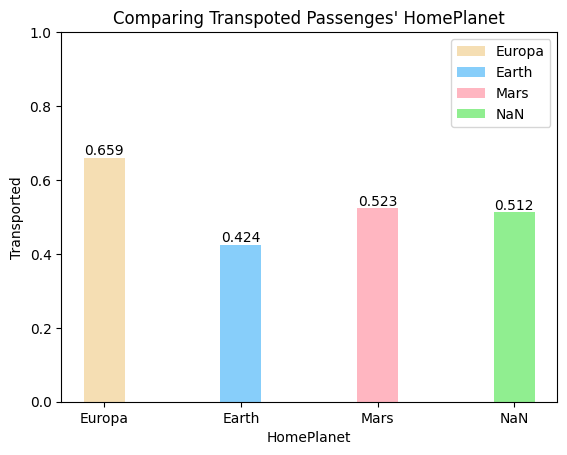

In [47]:
#'#F5DEB3', '#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3'
HomePlanet_Transported_bar_Europa = plt.bar("Europa", np.round(HomePlanet_Transported_Europa/HomePlanet_Europa,3), width=0.3, color=['#F5DEB3'], label = "Europa");
HomePlanet_Transported_bar_Earth = plt.bar("Earth", np.round(HomePlanet_Transported_Earth/HomePlanet_Earth,3), width=0.3, color=['#87CEFA'], label = "Earth");
HomePlanet_Transported_bar_Mars = plt.bar("Mars", np.round(HomePlanet_Transported_Mars/HomePlanet_Mars,3), width=0.3, color=['#FFB6C1'], label = "Mars");
HomePlanet_Transported_bar_N = plt.bar("NaN", np.round(HomePlanet_Transported_N/HomePlanet_N,3), width=0.3, color=['#90EE90'], label = "NaN");
plt.title("Comparing Transpoted Passenges' HomePlanet")
plt.xlabel('HomePlanet')
plt.ylabel('Transported')
plt.ylim(0,1)
plt.legend()

plt.text("Europa", np.round(HomePlanet_Transported_Europa/HomePlanet_Europa,3), np.round(HomePlanet_Transported_Europa/HomePlanet_Europa,3), ha='center', va='bottom')
plt.text("Earth", np.round(HomePlanet_Transported_Earth/HomePlanet_Earth,3), np.round(HomePlanet_Transported_Earth/HomePlanet_Earth,3), ha='center', va='bottom')
plt.text("Mars", np.round(HomePlanet_Transported_Mars/HomePlanet_Mars,3), np.round(HomePlanet_Transported_Mars/HomePlanet_Mars,3), ha='center', va='bottom')
plt.text("NaN", np.round(HomePlanet_Transported_N/HomePlanet_N,3), np.round(HomePlanet_Transported_N/HomePlanet_N,3), ha='center', va='bottom')

Text(NaN, 201, '201')

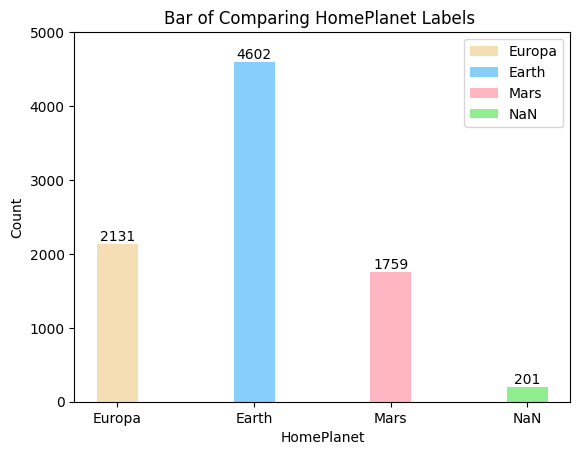

In [21]:
HomePlanet_bar_Europa = plt.bar("Europa", HomePlanet_Europa, width=0.3, color=['#F5DEB3'], label = "Europa");
HomePlanet_bar_Earth = plt.bar("Earth", HomePlanet_Earth, width=0.3, color=['#87CEFA'], label = "Earth");
HomePlanet_bar_Mars = plt.bar("Mars", HomePlanet_Mars, width=0.3, color=['#FFB6C1'], label = "Mars");
HomePlanet_bar_N = plt.bar("NaN", HomePlanet_N, width=0.3, color=['#90EE90'], label = "NaN");
plt.title("Bar of Comparing HomePlanet Labels ")
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.yticks(range(0,6000,1000))
plt.legend()

plt.text("Europa", HomePlanet_Europa, HomePlanet_Europa, ha='center', va='bottom')
plt.text("Earth", HomePlanet_Earth, HomePlanet_Earth, ha='center', va='bottom')
plt.text("Mars", HomePlanet_Mars, HomePlanet_Mars, ha='center', va='bottom')
plt.text("NaN", HomePlanet_N, HomePlanet_N, ha='center', va='bottom')

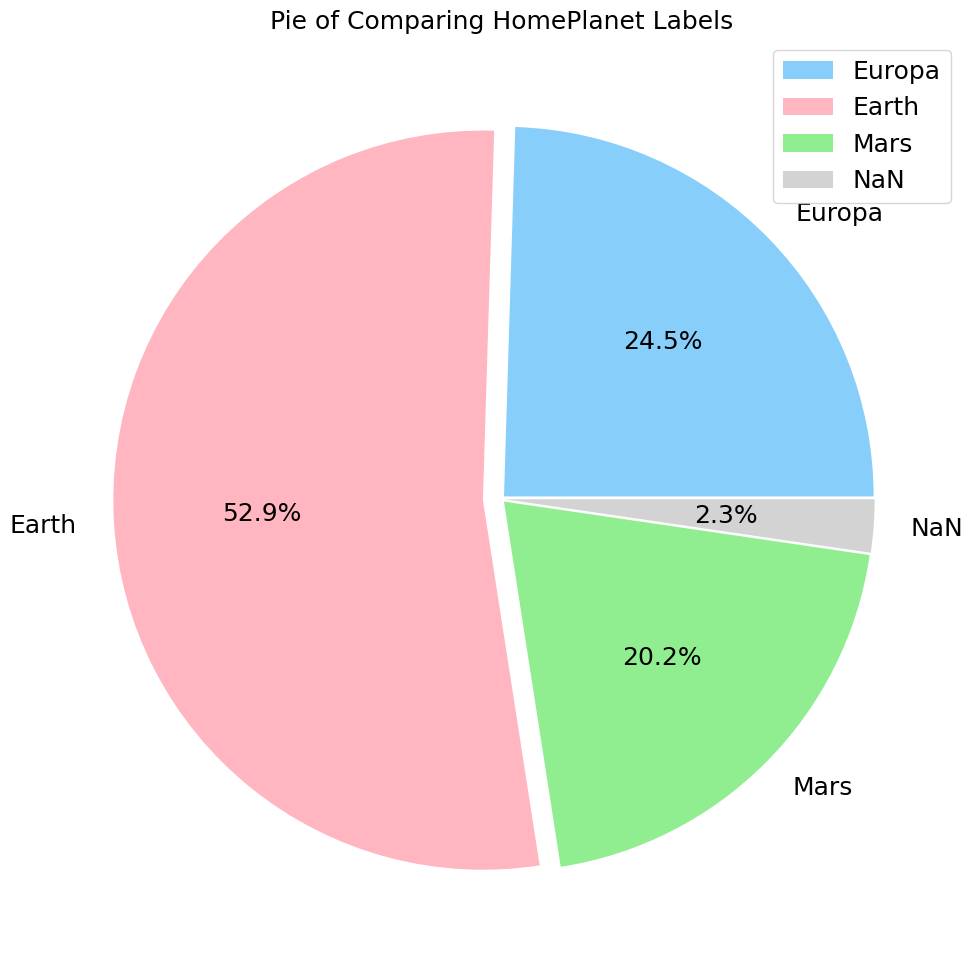

In [22]:
plt.figure(figsize=(12,12))

HomePlanet_labels = ['Europa', 'Earth', 'Mars', 'NaN']
HomePlanet_explode = [0.01, 0.05, 0.01, 0.01]# 设置每块区域离圆心的距离，这里True区域凸出一点点
HomePlanet_values = [HomePlanet_Europa, HomePlanet_Earth, HomePlanet_Mars, HomePlanet_N]
HomePlanet_colors = ['#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3']
 
_, l_text, p_text = plt.pie(HomePlanet_values, explode=HomePlanet_explode, labels=HomePlanet_labels, autopct='%1.1f%%', colors=HomePlanet_colors)
 
# 设置标签字体大小
for t in l_text:
    t.set_size(18)
# 设置数值字体大小
for t in p_text:
    t.set_size(18)
 
plt.title(u'Pie of Comparing HomePlanet Labels', fontsize=18)
plt.legend(fontsize=18)

目的地

In [23]:
Destination_T = 0;
Destination_P = 0;
Destination_C = 0;
Destination_N = 0;
Destination = train_set['Destination']
for i in Destination:
    if i == "TRAPPIST-1e":
        Destination_T  = Destination_T  + 1;
    elif i == "PSO J318.5-22":
        Destination_P = Destination_P + 1;
    elif i == "55 Cancri e":
        Destination_C = Destination_C + 1
    else:
        Destination_N = Destination_N + 1;
print(Destination_T, Destination_P, Destination_C, Destination_N)

Destination_Transported_T = 0;
Destination_Transported_P = 0;
Destination_Transported_C = 0;
Destination_Transported_N = 0;
Destination = train_set['Destination']
Destination = list(Destination)

for i in range(0,8693):
    if Destination[i] == "TRAPPIST-1e":
        if Transported[i] == True:
            Destination_Transported_T  = Destination_Transported_T  + 1;
    elif Destination[i] == "PSO J318.5-22":
        if Transported[i] == True:
            Destination_Transported_P = Destination_Transported_P + 1;
    elif Destination[i] == "55 Cancri e":
        if Transported[i] == True:
            Destination_Transported_C = Destination_Transported_C + 1
    else:
        if Transported[i] == True:
            Destination_Transported_N = Destination_Transported_N + 1;
print(Destination_Transported_T, Destination_Transported_P, Destination_Transported_C, Destination_Transported_N)

5915 796 1800 182
2787 401 1098 92


Text(NaN, 0.505, '0.505')

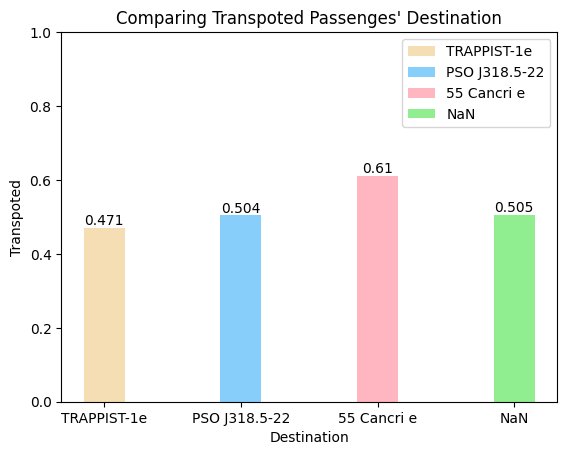

In [48]:
#'#F5DEB3', '#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3'
Destination_Transported_T = np.round(Destination_Transported_T/Destination_T,3)
Destination_Transported_P = np.round(Destination_Transported_P/Destination_P,3)
Destination_Transported_C = np.round(Destination_Transported_C/Destination_C,3)
Destination_Transported_N = np.round(Destination_Transported_N/Destination_N,3)
Destination_Transported_bar_T = plt.bar("TRAPPIST-1e", Destination_Transported_T, width=0.3, color=['#F5DEB3'], label = "TRAPPIST-1e");
Destination_Transported_bar_p = plt.bar("PSO J318.5-22", Destination_Transported_P, width=0.3, color=['#87CEFA'], label = "PSO J318.5-22");
Destination_Transported_bar_C = plt.bar("55 Cancri e", Destination_Transported_C, width=0.3, color=['#FFB6C1'], label = "55 Cancri e");
Destination_Transported_bar_N = plt.bar("NaN", Destination_Transported_N, width=0.3, color=['#90EE90'], label = "NaN");
plt.title("Comparing Transpoted Passenges' Destination")
plt.xlabel('Destination')
plt.ylabel('Transpoted')
plt.ylim(0,1)
plt.legend()

plt.text("TRAPPIST-1e", Destination_Transported_T, Destination_Transported_T, ha='center', va='bottom')
plt.text("PSO J318.5-22", Destination_Transported_P, Destination_Transported_P, ha='center', va='bottom')
plt.text("55 Cancri e", Destination_Transported_C, Destination_Transported_C, ha='center', va='bottom')
plt.text("NaN", Destination_Transported_N, Destination_Transported_N, ha='center', va='bottom')

Text(NaN, 182, '182')

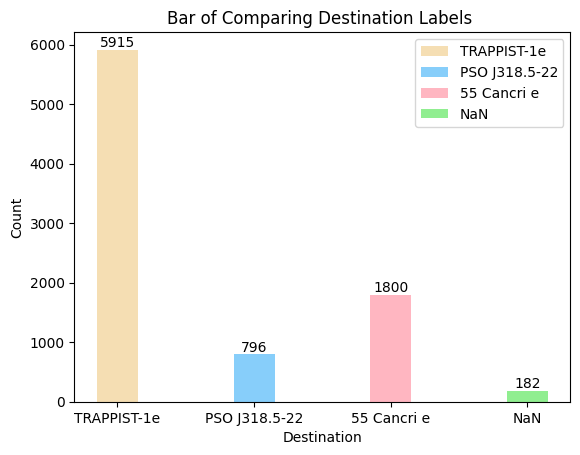

In [25]:
Destination_bar_T = plt.bar("TRAPPIST-1e", Destination_T, width=0.3, color=['#F5DEB3'], label = "TRAPPIST-1e");
Destination_bar_p = plt.bar("PSO J318.5-22", Destination_P, width=0.3, color=['#87CEFA'], label = "PSO J318.5-22");
Destination_bar_C = plt.bar("55 Cancri e", Destination_C, width=0.3, color=['#FFB6C1'], label = "55 Cancri e");
Destination_bar_N = plt.bar("NaN", Destination_N, width=0.3, color=['#90EE90'], label = "NaN");
plt.title("Bar of Comparing Destination Labels ")
plt.xlabel('Destination')
plt.ylabel('Count')
plt.yticks(range(0,7000,1000))
plt.legend()

plt.text("TRAPPIST-1e", Destination_T, Destination_T, ha='center', va='bottom')
plt.text("PSO J318.5-22", Destination_P, Destination_P, ha='center', va='bottom')
plt.text("55 Cancri e", Destination_C, Destination_C, ha='center', va='bottom')
plt.text("NaN", Destination_N, Destination_N, ha='center', va='bottom')

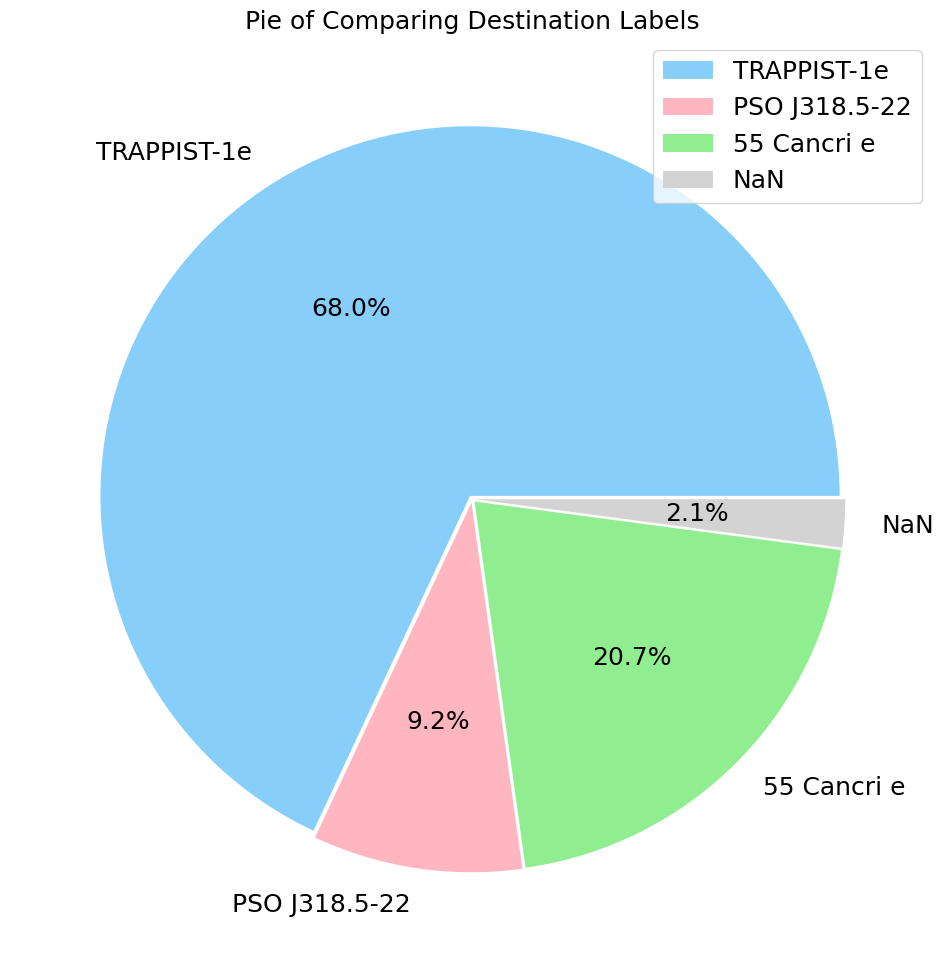

In [26]:
plt.figure(figsize=(12,12))

Destination_labels = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'NaN']
Destination_explode = [0.01, 0.01, 0.01, 0.01]# 设置每块区域离圆心的距离，这里True区域凸出一点点
Destination_values = [Destination_T, Destination_P, Destination_C, Destination_N]
Destination_colors = ['#87CEFA', '#FFB6C1', '#90EE90', '#D3D3D3']
 
_, l_text, p_text = plt.pie(Destination_values, explode=Destination_explode, labels=Destination_labels, autopct='%1.1f%%', colors=Destination_colors)
 
# 设置标签字体大小
for t in l_text:
    t.set_size(18)
# 设置数值字体大小
for t in p_text:
    t.set_size(18)
 
plt.title(u'Pie of Comparing Destination Labels', fontsize=18)
plt.legend(fontsize=18)

年龄

In [51]:
from cmath import isnan

Age_x = [0] * 81
Age = train_set['Age']
for i in Age:
    if isnan(i):
        Age_x[80] = Age_x[80] + 1;
    else:
        i = int(i)
        Age_x[i] = Age_x[i] + 1;
# print(Age_x)

Age_Transported_x = [0] * 81
Age = list(Age)
for i in range(0,8693):
    if isnan(Age[i]):
        if(Transported[i]  == True):
            Age_Transported_x[80] = Age_Transported_x[80] + 1;
    else:
        a = int(Age[i])
        if(Transported[i]  == True):
            Age_Transported_x[a] = Age_Transported_x[a] + 1;
# print(Age_Transported_x)

Age_Transported_Age_x = [0] * 81
for i in range(0,81):
    Age_Transported_Age_x[i] = Age_Transported_x[i]/Age_x[i]
Age_Transported_Age_x = [float('{:.4f}'.format(i)) for i in Age_Transported_Age_x]
# print(Age_Transported_Age_x)

for i in range(0,81):
    Age_Transported_x[i] = Age_Transported_x[i]/Transported_T
Age_Transported_x = [float('{:.4f}'.format(i)) for i in Age_Transported_x]
# print(Age_Transported_x)

for i in range(len(Age_x)):
    Age_x[i] = np.round(Age_x[i]/8093,3)

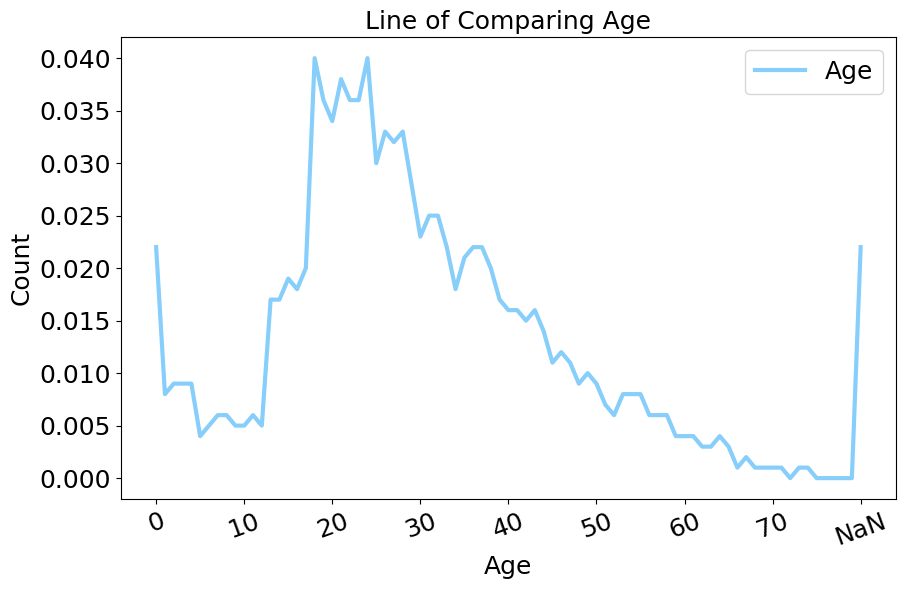

In [52]:
x_ticks = range(0,81)

Age_line_x = np.arange(len(x_ticks))
 
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(Age_line_x, Age_x, color='#87CEFA', label='Age', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,10,20,30,40,50,60,70,80), (0,10,20,30,40,50,60,70,'NaN'),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Age', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Age', fontsize=18)
plt.legend(fontsize=18)

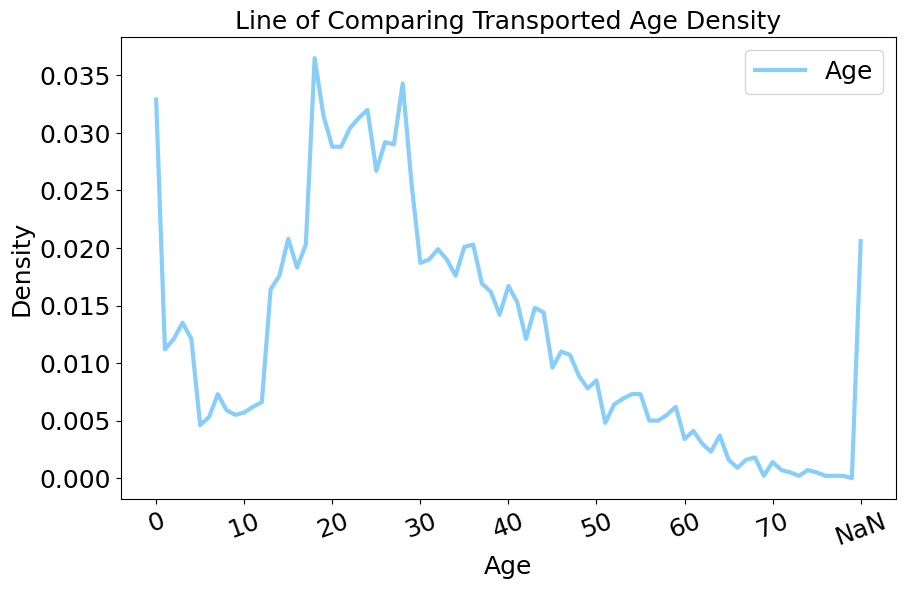

In [29]:
x_ticks = range(0,81)

Age_line_x = np.arange(len(x_ticks))
 
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(Age_line_x, Age_Transported_x, color='#87CEFA', label='Age', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,10,20,30,40,50,60,70,80), (0,10,20,30,40,50,60,70,'NaN'),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Age', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported Age Density', fontsize=18)
plt.legend(fontsize=18)

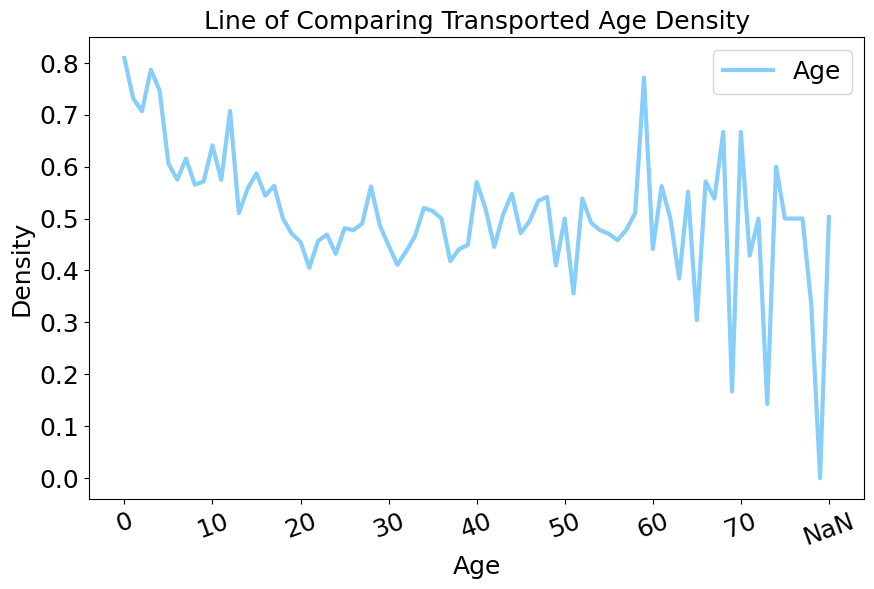

In [30]:
x_ticks = range(0,81)

Age_line_x = np.arange(len(x_ticks))
 
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(Age_line_x, Age_Transported_Age_x, color='#87CEFA', label='Age', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,10,20,30,40,50,60,70,80), (0,10,20,30,40,50,60,70,'NaN'),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Age', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported Age Density', fontsize=18)
plt.legend(fontsize=18)

In [31]:
from cmath import isnan

RoomService_x = [0] * 14329
FoodCourt_x = [0] * 29815
ShoppingMall_x = [0] * 23494
Spa_x = [0] * 22410
VRDeck_x = [0] * 24135

RoomService = train_set['RoomService']
FoodCourt = train_set['FoodCourt']
ShoppingMall = train_set['ShoppingMall']
Spa = train_set['Spa']
VRDeck = train_set['VRDeck']

for i in RoomService:
    if isnan(i):
        RoomService_x[14328] = RoomService_x[14328] + 1;
    else:
        i = int(i)
        RoomService_x[i] = RoomService_x[i] + 1;
for i in FoodCourt:
    if isnan(i):
        FoodCourt_x[29814] = FoodCourt_x[29814] + 1;
    else:
        i = int(i)
        FoodCourt_x[i] = FoodCourt_x[i] + 1;
for i in ShoppingMall:
    if isnan(i):
        ShoppingMall_x[23493] = ShoppingMall_x[23493] + 1;
    else:
        i = int(i)
        ShoppingMall_x[i] = ShoppingMall_x[i] + 1;
for i in Spa:
    if isnan(i):
        Spa_x[22409] = Spa_x[22409] + 1;
    else:
        i = int(i)
        Spa_x[i] = Spa_x[i] + 1;
for i in VRDeck:
    if isnan(i):
        VRDeck_x[24134] = VRDeck_x[24134] + 1;
    else:
        i = int(i)
        VRDeck_x[i] = VRDeck_x[i] + 1;


RoomService_Transported_x = [0] * 14329
FoodCourt_Transported_x = [0] * 29815
ShoppingMall_Transported_x = [0] * 23494
Spa_Transported_x = [0] * 22410
VRDeck_Transported_x = [0] * 24135

RoomService = list(RoomService)
FoodCourt = list(FoodCourt)
ShoppingMall = list(ShoppingMall)
Spa = list(Spa)
VRDeck = list(VRDeck)

for i in range(0,len(RoomService)):
    if isnan(RoomService[i]):
        if(Transported[i]  == True):
            RoomService_Transported_x[14328] = RoomService_Transported_x[14328] + 1;
    else:
        a = int(RoomService[i])
        if(Transported[i]  == True):
            RoomService_Transported_x[a] = RoomService_Transported_x[a] + 1;

for i in range(0,len(FoodCourt)):
    if isnan(FoodCourt[i]):
        if(Transported[i]  == True):
            FoodCourt_Transported_x[29814] = FoodCourt_Transported_x[29814] + 1;
    else:
        a = int(FoodCourt[i])
        if(Transported[i]  == True):
            FoodCourt_Transported_x[a] = FoodCourt_Transported_x[a] + 1;

for i in range(0,len(ShoppingMall)):
    if isnan(ShoppingMall[i]):
        if(Transported[i]  == True):
            ShoppingMall_Transported_x[23493] = ShoppingMall_Transported_x[23493] + 1;
    else:
        a = int(ShoppingMall[i])
        if(Transported[i]  == True):
            ShoppingMall_Transported_x[a] = ShoppingMall_Transported_x[a] + 1;

for i in range(0,len(Spa)):
    if isnan(Spa[i]):
        if(Transported[i]  == True):
            Spa_Transported_x[22409] = Spa_Transported_x[22409] + 1;
    else:
        a = int(Spa[i])
        if(Transported[i]  == True):
            Spa_Transported_x[a] = Spa_Transported_x[a] + 1;

for i in range(0,len(VRDeck)):
    if isnan(VRDeck[i]):
        if(Transported[i]  == True):
            VRDeck_Transported_x[24134] = VRDeck_Transported_x[24134] + 1;
    else:
        a = int(VRDeck[i])
        if(Transported[i]  == True):
            VRDeck_Transported_x[a] = VRDeck_Transported_x[a] + 1;

RoomService_Transported_Age_x = [0] * 14329
FoodCourt_Transported_Age_x = [0] * 29815
ShoppingMall_Transported_Age_x = [0] * 23494
Spa_Transported_Age_x = [0] * 22410
VRDeck_Transported_Age_x = [0] * 24135

for i in range(0,len(RoomService)):
    if(RoomService_x[i] == 0):
        RoomService_Transported_Age_x[i] = 0
    else:
        RoomService_Transported_Age_x[i] = RoomService_Transported_x[i]/RoomService_x[i]
RoomService_Transported_Age_x = [float('{:.4f}'.format(i)) for i in RoomService_Transported_Age_x]


for i in range(0,len(FoodCourt)):
    if(FoodCourt_x[i] == 0):
        FoodCourt_Transported_Age_x[i] = 0
    else:
        FoodCourt_Transported_Age_x[i] = FoodCourt_Transported_x[i]/FoodCourt_x[i]
FoodCourt_Transported_Age_x = [float('{:.4f}'.format(i)) for i in FoodCourt_Transported_Age_x]


for i in range(0,len(ShoppingMall)):
    if(ShoppingMall_x[i] == 0):
        ShoppingMall_Transported_Age_x[i] = 0
    else:
        ShoppingMall_Transported_Age_x[i] = ShoppingMall_Transported_x[i]/ShoppingMall_x[i]
ShoppingMall_Transported_Age_x = [float('{:.4f}'.format(i)) for i in ShoppingMall_Transported_Age_x]


for i in range(0,len(Spa)):
    if(Spa_x[i] == 0):
        Spa_Transported_Age_x[i] = 0
    else:
        Spa_Transported_Age_x[i] = Spa_Transported_x[i]/Spa_x[i]
Spa_Transported_Age_x = [float('{:.4f}'.format(i)) for i in Spa_Transported_Age_x]


for i in range(0,len(VRDeck)):
    if(VRDeck_x[i] == 0):
        VRDeck_Transported_Age_x[i] = 0
    else:
        VRDeck_Transported_Age_x[i] = VRDeck_Transported_x[i]/VRDeck_x[i]
VRDeck_Transported_Age_x = [float('{:.4f}'.format(i)) for i in VRDeck_Transported_Age_x]


# for i in range(0,len(RoomService)):
#     RoomService_Transported_x[i] = RoomService_Transported_x[i]/Transported_T
# RoomService_Transported_x = [float('{:.4f}'.format(i)) for i in RoomService_Transported_x]


# for i in range(0,len(FoodCourt)):
#     FoodCourt_Transported_x[i] = FoodCourt_Transported_x[i]/Transported_T
# FoodCourt_Transported_x = [float('{:.4f}'.format(i)) for i in FoodCourt_Transported_x]


# for i in range(0,len(ShoppingMall)):
#     ShoppingMall_Transported_x[i] = ShoppingMall_Transported_x[i]/Transported_T
# ShoppingMall_Transported_x = [float('{:.4f}'.format(i)) for i in ShoppingMall_Transported_x]


# for i in range(0,len(Spa)):
#     Spa_Transported_x[i] = Spa_Transported_x[i]/Transported_T
# Spa_Transported_x = [float('{:.4f}'.format(i)) for i in Spa_Transported_x]


# for i in range(0,len(VRDeck)):
#     VRDeck_Transported_x[i] = VRDeck_Transported_x[i]/Transported_T
# VRDeck_Transported_x = [float('{:.4f}'.format(i)) for i in VRDeck_Transported_x]


统计五个数据下不同花费的人数多少

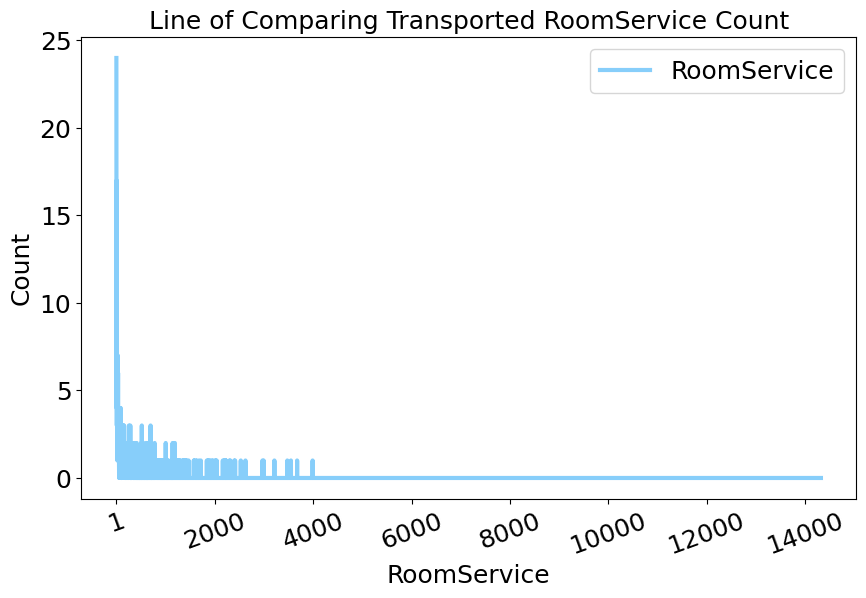

In [56]:
RoomService_Transported_x.pop(0)
RoomService_Transported_x.pop(-1)
x_ticks = range(0,len(RoomService_Transported_x))

RoomService_line_x = np.arange(len(x_ticks))
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(RoomService_line_x, RoomService_Transported_x, color='#87CEFA', label='RoomService', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((1,2000,4000,6000,8000,10000,12000,14000), (1,2000,4000,6000,8000,10000,12000,14000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'RoomService', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported RoomService Count', fontsize=18)
plt.legend(fontsize=18)

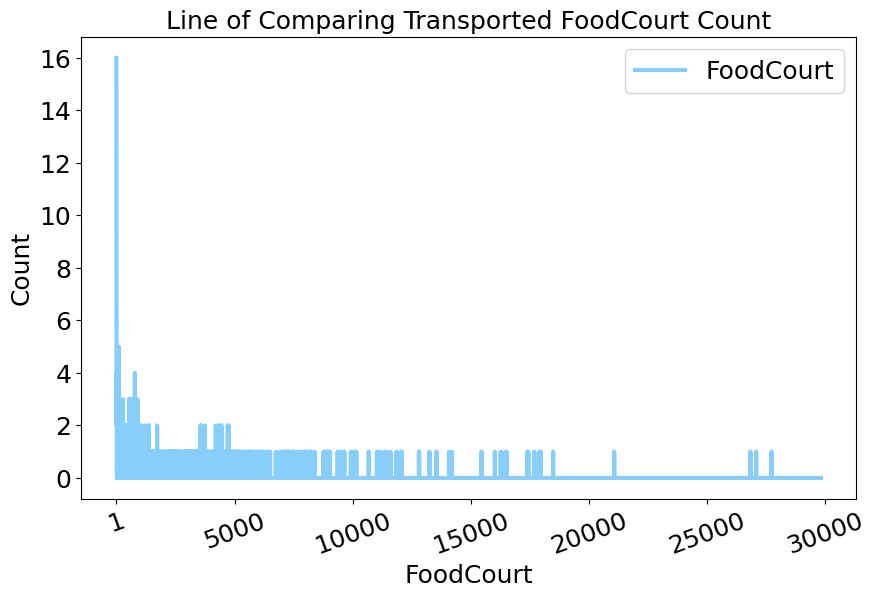

In [57]:
FoodCourt_Transported_x.pop(0)
FoodCourt_Transported_x.pop(-1)
x_ticks = range(0,len(FoodCourt_Transported_x))

FoodCourt_line_x = np.arange(len(x_ticks))
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(FoodCourt_line_x, FoodCourt_Transported_x, color='#87CEFA', label='FoodCourt', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((1,5000,10000,15000,20000,25000,30000), (1,5000,10000,15000,20000,25000,30000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'FoodCourt', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported FoodCourt Count', fontsize=18)
plt.legend(fontsize=18)

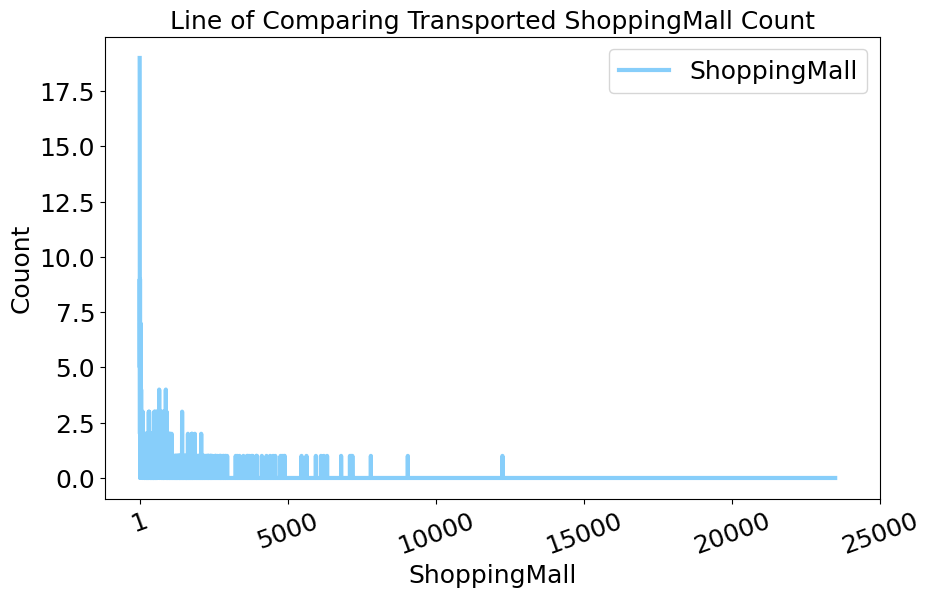

In [60]:
ShoppingMall_Transported_x.pop(0)
ShoppingMall_Transported_x.pop(-1)
x_ticks = range(0,len(ShoppingMall_Transported_x))

ShoppingMall_line_x = np.arange(len(x_ticks))
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(ShoppingMall_line_x, ShoppingMall_Transported_x, color='#87CEFA', label='ShoppingMall', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((1,5000,10000,15000,20000,25000), (1,5000,10000,15000,20000,25000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'ShoppingMall', fontsize=18)
plt.ylabel(u'Couont', fontsize=18)
plt.title(u'Line of Comparing Transported ShoppingMall Count', fontsize=18)
plt.legend(fontsize=18)

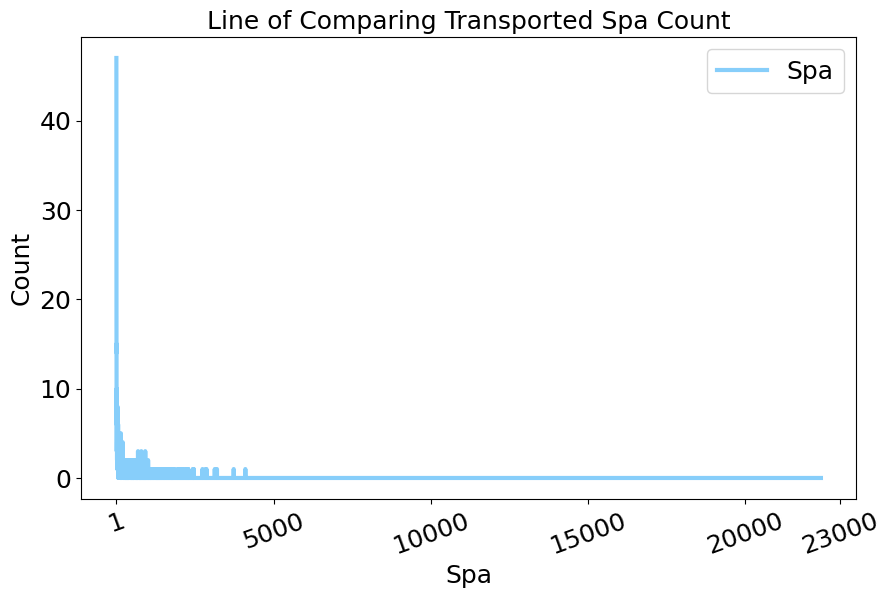

In [59]:
Spa_Transported_x.pop(0)
Spa_Transported_x.pop(-1)
x_ticks = range(0,len(Spa_Transported_x))

Spa_line_x = np.arange(len(x_ticks))
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(Spa_line_x, Spa_Transported_x, color='#87CEFA', label='Spa', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((1,5000,10000,15000,20000,23000), (1,5000,10000,15000,20000,23000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Spa', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported Spa Count', fontsize=18)
plt.legend(fontsize=18)

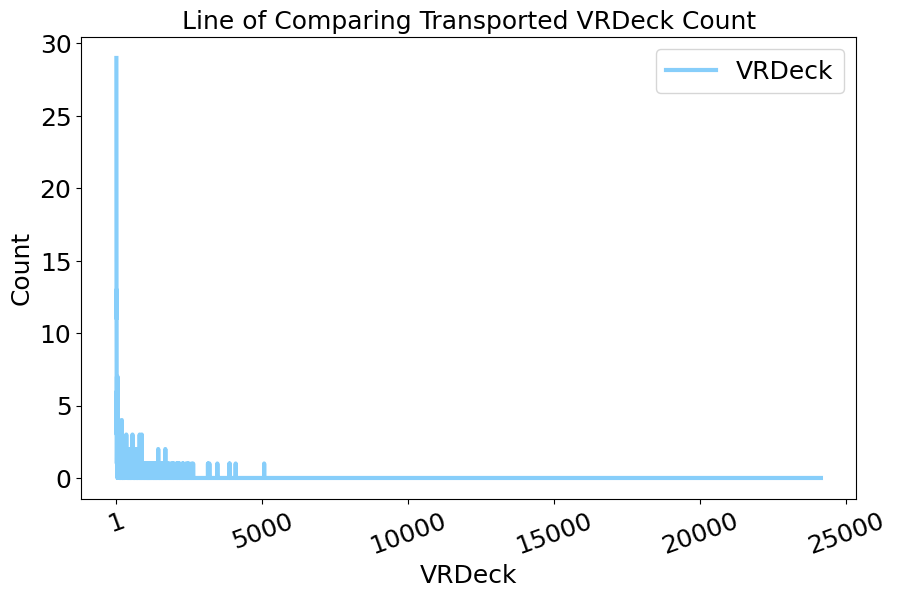

In [58]:
VRDeck_Transported_x.pop(0)
VRDeck_Transported_x.pop(-1)
x_ticks = range(0,len(VRDeck_Transported_x))

VRDeck_line_x = np.arange(len(x_ticks))
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(VRDeck_line_x, VRDeck_Transported_x, color='#87CEFA', label='VRDeck', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((1,5000,10000,15000,20000,25000), (1,5000,10000,15000,20000,25000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'VRDeck', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported VRDeck Count', fontsize=18)
plt.legend(fontsize=18)

统计在五个项目中不同花费的被运输的人占该花费所有人的比例

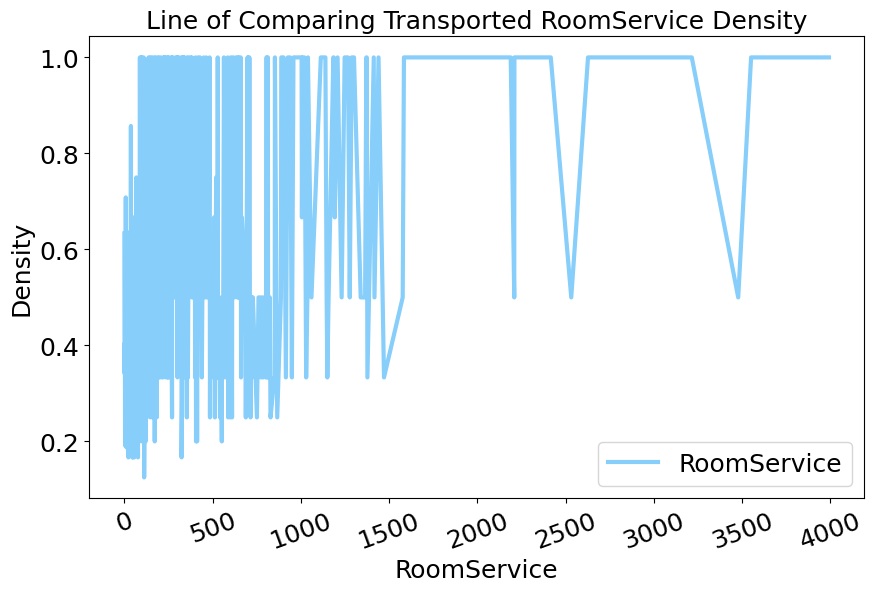

In [54]:
x = {}
for i in range(0, len(RoomService_Transported_Age_x)):
    if RoomService_Transported_Age_x[i] != 0:
        x[i] = RoomService_Transported_Age_x[i]
 
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(x.keys(), x.values(), color='#87CEFA', label='RoomService', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((0,500,1000,1500,2000,2500,3000,3500,4000), (0,500,1000,1500,2000,2500,3000,3500,4000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'RoomService', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported RoomService Density', fontsize=18)
plt.legend(fontsize=18)

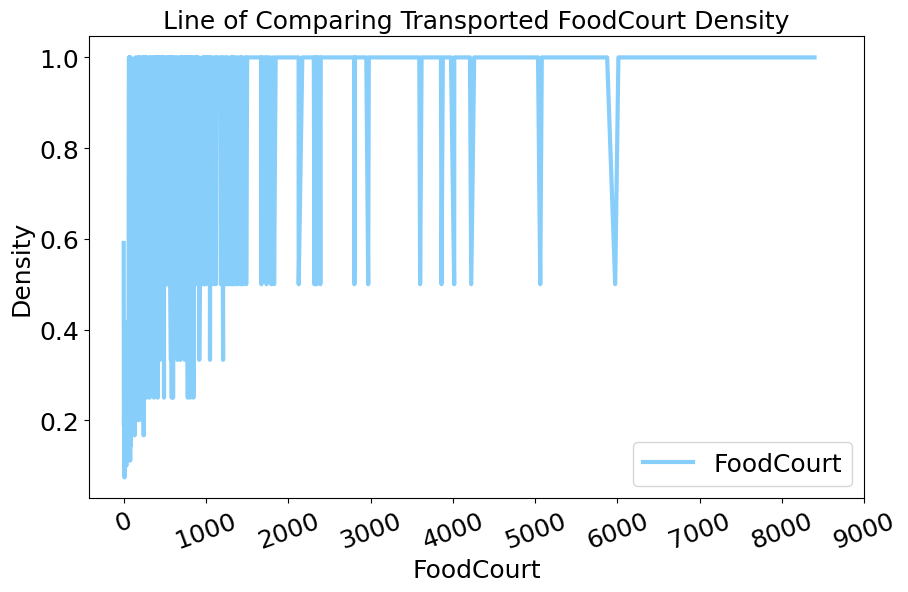

In [38]:
x = {}
for i in range(0, len(FoodCourt_Transported_Age_x)):
    if FoodCourt_Transported_Age_x[i] != 0:
        x[i] = FoodCourt_Transported_Age_x[i]

# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(x.keys(), x.values(), color='#87CEFA', label='FoodCourt', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,1000,2000,3000,4000,5000,6000,7000,8000,9000), (0,1000,2000,3000,4000,5000,6000,7000,8000,9000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'FoodCourt', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported FoodCourt Density', fontsize=18)
plt.legend(fontsize=18)

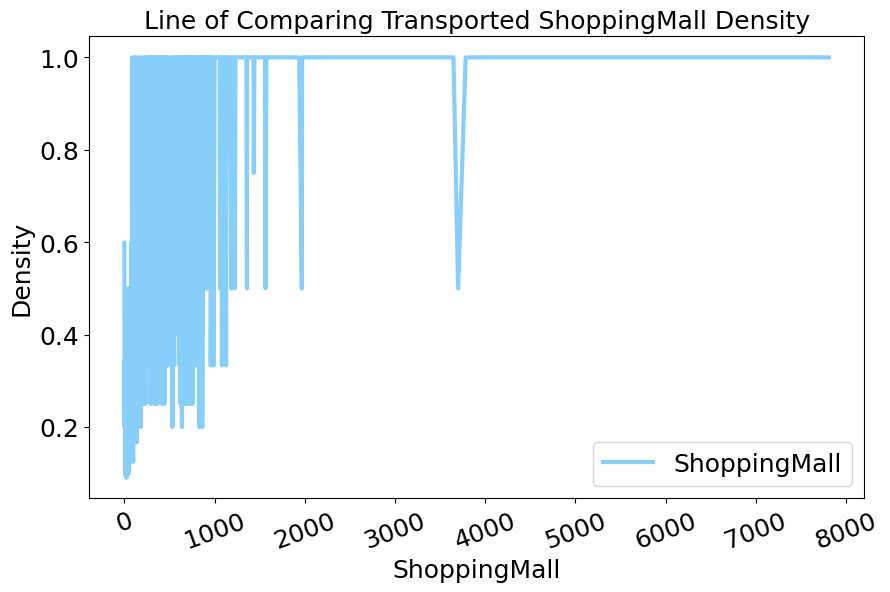

In [39]:
x = {}
for i in range(0, len(ShoppingMall_Transported_Age_x)):
    if ShoppingMall_Transported_Age_x[i] != 0:
        x[i] = ShoppingMall_Transported_Age_x[i]
 
# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(x.keys(), x.values(), color='#87CEFA', label='ShoppingMall', linewidth=3.0)
 
# 添加x轴和y轴刻度标签
plt.xticks((0,1000,2000,3000,4000,5000,6000,7000,8000), (0,1000,2000,3000,4000,5000,6000,7000,8000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'ShoppingMall', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported ShoppingMall Density', fontsize=18)
plt.legend(fontsize=18)

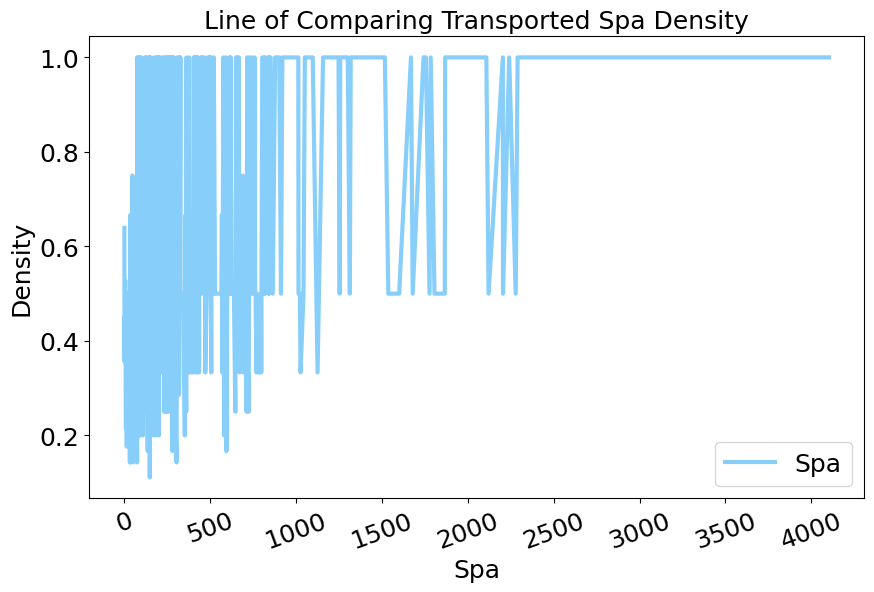

In [40]:
x = {}
for i in range(0, len(Spa_Transported_Age_x)):
    if Spa_Transported_Age_x[i] != 0:
        x[i] = Spa_Transported_Age_x[i]

# 设置画布大小
plt.figure(figsize=(10, 6))
plt.plot(x.keys(), x.values(), color='#87CEFA', label='Spa', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,500,1000,1500,2000,2500,3000,3500,4000), (0,500,1000,1500,2000,2500,3000,3500,4000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Spa', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported Spa Density', fontsize=18)
plt.legend(fontsize=18)

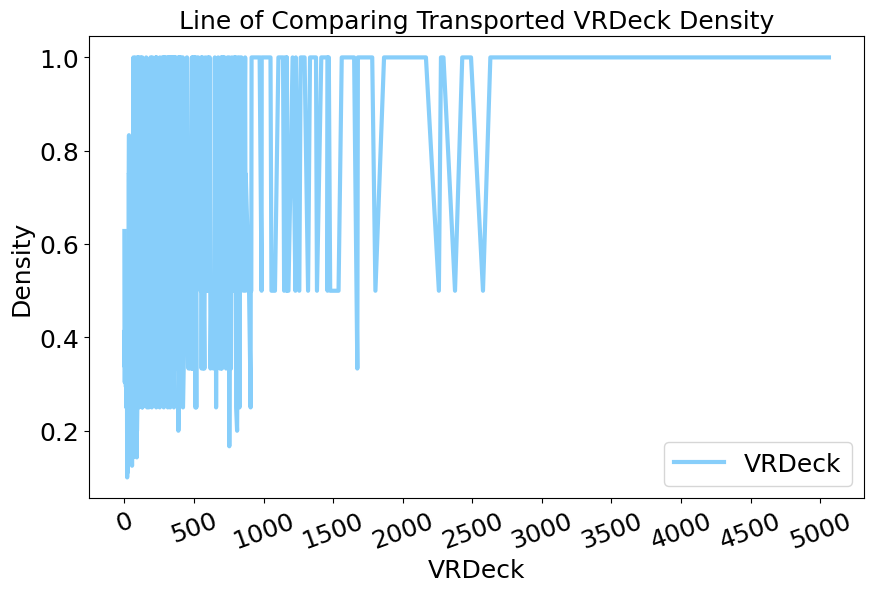

In [41]:
x = {}
for i in range(0, len(VRDeck_Transported_Age_x)):
    if VRDeck_Transported_Age_x[i] != 0:
        x[i] = VRDeck_Transported_Age_x[i]
# 设置画布大小

plt.figure(figsize=(10, 6))
plt.plot(x.keys(), x.values(), color='#87CEFA', label='VRDeck', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000), (0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'VRDeck', fontsize=18)
plt.ylabel(u'Density', fontsize=18)
plt.title(u'Line of Comparing Transported VRDeck Density', fontsize=18)
plt.legend(fontsize=18)

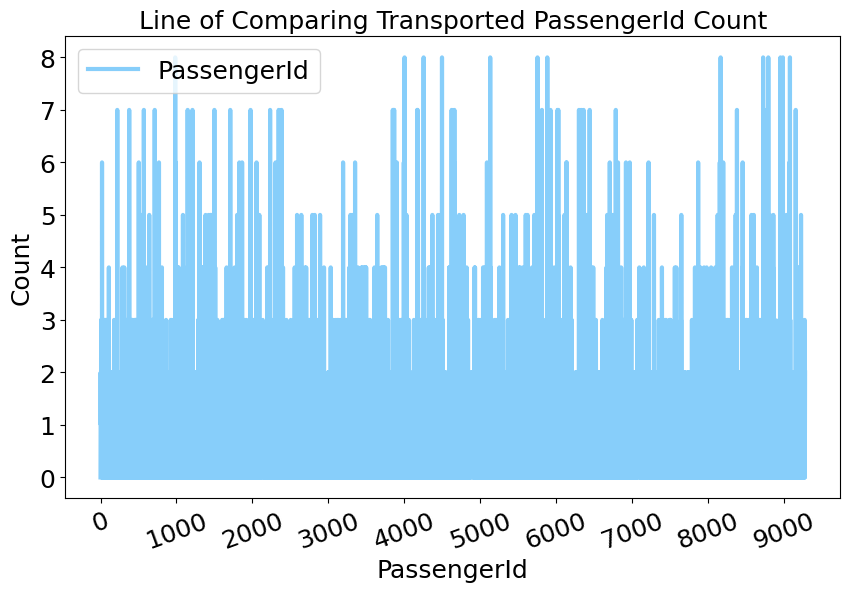

In [42]:
PassengerId = train_set["PassengerId"]
PassengerId_ = []
for i in PassengerId:
    i = i.split("_")
    i = int(i[0])
    PassengerId_.append(i)

PassengerId_x = {}
for i in range(0,9281):
    PassengerId_x[i] = 0

for i in range(0,len(PassengerId_)):
    j = PassengerId_[i]
    PassengerId_x[j] = PassengerId_x[j] + 1

plt.figure(figsize=(10, 6))
plt.plot(PassengerId_x.keys(), PassengerId_x.values(), color='#87CEFA', label='PassengerId', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,1000,2000,3000,4000,5000,6000,7000,8000,9000), (0,1000,2000,3000,4000,5000,6000,7000,8000,9000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'PassengerId', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported PassengerId Count', fontsize=18)
plt.legend(fontsize=18)

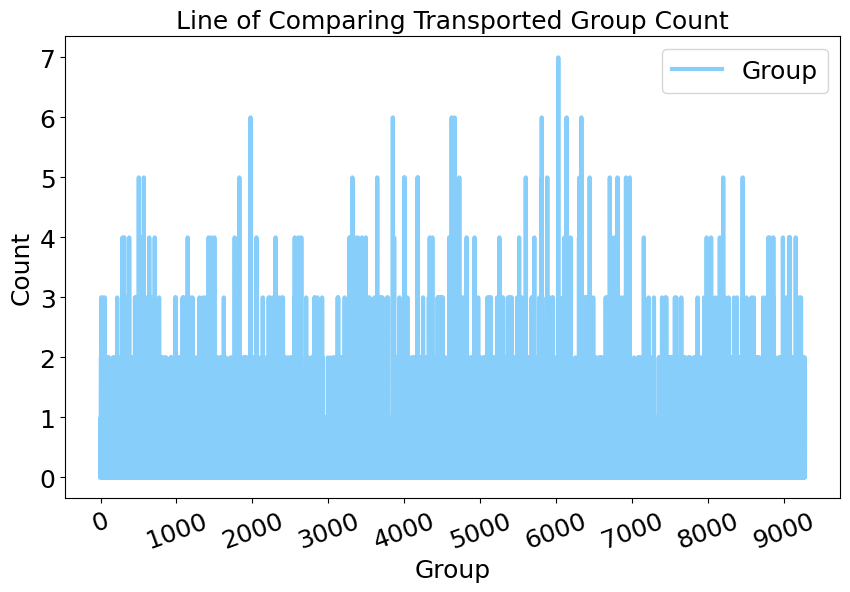

In [65]:
PassengerId = train_set["PassengerId"]
PassengerId_ = []
for i in range(0,len(PassengerId)):
    if Transported[i] == True:
        i = PassengerId[i].split("_")
        i = int(i[0])
        PassengerId_.append(i)

PassengerId_Transported_x = {}
for i in range(0,9281):
    PassengerId_Transported_x[i] = 0

for i in range(0,len(PassengerId_)):
    j = PassengerId_[i]
    PassengerId_Transported_x[j] = PassengerId_Transported_x[j] + 1

plt.figure(figsize=(10, 6))
plt.plot(PassengerId_Transported_x.keys(), PassengerId_Transported_x.values(), color='#87CEFA', label='Group', linewidth=3.0)
 
 
# 添加x轴和y轴刻度标签
plt.xticks((0,1000,2000,3000,4000,5000,6000,7000,8000,9000), (0,1000,2000,3000,4000,5000,6000,7000,8000,9000),fontsize=18, rotation=20)
plt.yticks(fontsize=18)
 
# 添加x轴和y轴标签
plt.xlabel(u'Group', fontsize=18)
plt.ylabel(u'Count', fontsize=18)
plt.title(u'Line of Comparing Transported Group Count', fontsize=18)
plt.legend(fontsize=18)

Cabin

In [44]:
Cabin  = train_set["Cabin"]

Cabin_d = []
for i in Cabin:
    if type(i) == str:
        i = i.split("/")
        i = i[0]
        Cabin_d.append(i)
    else:
        Cabin_d.append('0')

Cabin_Transported_d = []
for i in range(0,len(Cabin_d)):
    if Transported[i] == True:
        Cabin_Transported_d.append(Cabin_d[i])

Cabin_Transported_Deck = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':0,'0':0}
Cabin_Deck = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':0,'0':0}
Cabin_Transported_Deck_Destiny = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'T':0,'0':0}

for i in Cabin_d:
    Cabin_Deck[i] = Cabin_Deck[i] + 1
for i in Cabin_Transported_d:
    Cabin_Transported_Deck[i] = Cabin_Transported_Deck[i] + 1
for i in Cabin_Transported_Deck_Destiny:
    Cabin_Transported_Deck_Destiny[i] = Cabin_Transported_Deck[i] / Cabin_Deck[i]
    Cabin_Transported_Deck_Destiny[i] = float('{:.4f}'.format(Cabin_Transported_Deck_Destiny[i]))


Text(NaN, 100, '100')

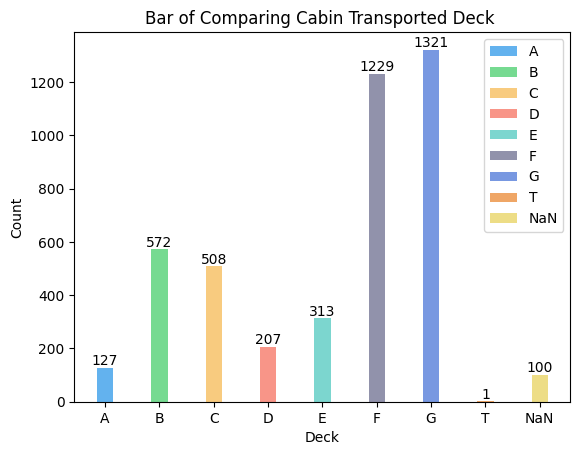

In [45]:
Cabin_Transported_Deck_A = plt.bar("A", Cabin_Transported_Deck['A'], width=0.3, color=['#63b2ee'], label = "A");
Cabin_Transported_Deck_B = plt.bar("B", Cabin_Transported_Deck['B'], width=0.3, color=['#76da91'], label = "B");
Cabin_Transported_Deck_C = plt.bar("C", Cabin_Transported_Deck['C'], width=0.3, color=['#f8cb7f'], label = "C");
Cabin_Transported_Deck_D = plt.bar("D", Cabin_Transported_Deck['D'], width=0.3, color=['#f89588'], label = "D");
Cabin_Transported_Deck_E = plt.bar("E", Cabin_Transported_Deck['E'], width=0.3, color=['#7cd6cf'], label = "E");
Cabin_Transported_Deck_F = plt.bar("F", Cabin_Transported_Deck['F'], width=0.3, color=['#9192ab'], label = "F");
Cabin_Transported_Deck_G = plt.bar("G", Cabin_Transported_Deck['G'], width=0.3, color=['#7898e1'], label = "G");
Cabin_Transported_Deck_T = plt.bar("T", Cabin_Transported_Deck['T'], width=0.3, color=['#efa666'], label = "T");
Cabin_Transported_Deck_A = plt.bar("NaN", Cabin_Transported_Deck['0'], width=0.3, color=['#eddd86'], label = "NaN");
plt.title("Bar of Comparing Cabin Transported Deck ")
plt.xlabel('Deck')
plt.ylabel('Count')
plt.yticks(range(0,1400,200))
plt.legend()

plt.text("A", Cabin_Transported_Deck['A'], Cabin_Transported_Deck['A'], ha='center', va='bottom')
plt.text("B", Cabin_Transported_Deck['B'], Cabin_Transported_Deck['B'], ha='center', va='bottom')
plt.text("C", Cabin_Transported_Deck['C'], Cabin_Transported_Deck['C'], ha='center', va='bottom')
plt.text("D", Cabin_Transported_Deck['D'], Cabin_Transported_Deck['D'], ha='center', va='bottom')
plt.text("E", Cabin_Transported_Deck['E'], Cabin_Transported_Deck['E'], ha='center', va='bottom')
plt.text("F", Cabin_Transported_Deck['F'], Cabin_Transported_Deck['F'], ha='center', va='bottom')
plt.text("G", Cabin_Transported_Deck['G'], Cabin_Transported_Deck['G'], ha='center', va='bottom')
plt.text("T", Cabin_Transported_Deck['T'], Cabin_Transported_Deck['T'], ha='center', va='bottom')
plt.text("NaN", Cabin_Transported_Deck['0'], Cabin_Transported_Deck['0'], ha='center', va='bottom')

Text(NaN, 0.5025, '0.5025')

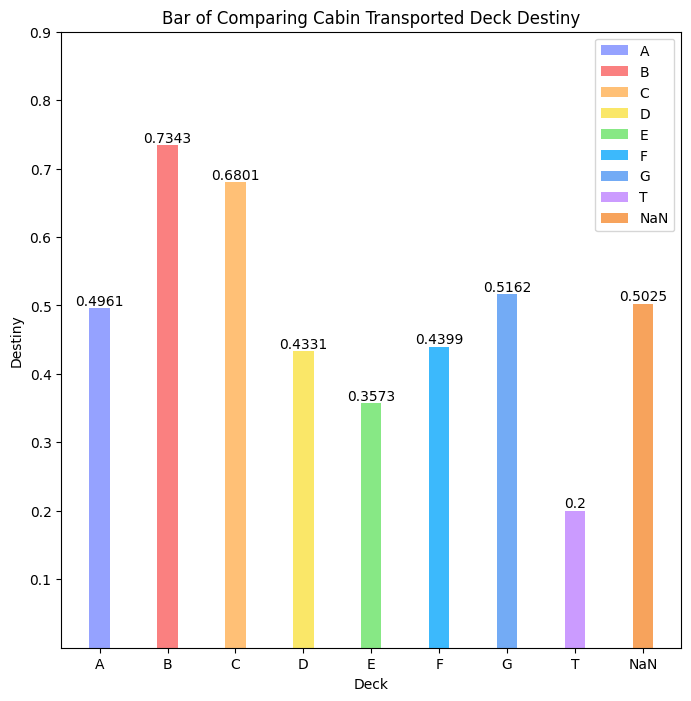

In [46]:
plt.figure(figsize=(8,8))
Cabin_Transported_Deck_Destiny_A = plt.bar("A", Cabin_Transported_Deck_Destiny['A'], width=0.3, color=['#95a2ff'], label = "A");
Cabin_Transported_Deck_Destiny_B = plt.bar("B", Cabin_Transported_Deck_Destiny['B'], width=0.3, color=['#fa8080'], label = "B");
Cabin_Transported_Deck_Destiny_C = plt.bar("C", Cabin_Transported_Deck_Destiny['C'], width=0.3, color=['#ffc076'], label = "C");
Cabin_Transported_Deck_Destiny_D = plt.bar("D", Cabin_Transported_Deck_Destiny['D'], width=0.3, color=['#fae768'], label = "D");
Cabin_Transported_Deck_Destiny_E = plt.bar("E", Cabin_Transported_Deck_Destiny['E'], width=0.3, color=['#87e885'], label = "E");
Cabin_Transported_Deck_Destiny_F = plt.bar("F", Cabin_Transported_Deck_Destiny['F'], width=0.3, color=['#3cb9fc'], label = "F");
Cabin_Transported_Deck_Destiny_G = plt.bar("G", Cabin_Transported_Deck_Destiny['G'], width=0.3, color=['#73abf5'], label = "G");
Cabin_Transported_Deck_Destiny_T = plt.bar("T", Cabin_Transported_Deck_Destiny['T'], width=0.3, color=['#cb9bff'], label = "T");
Cabin_Transported_Deck_Destiny_A = plt.bar("NaN", Cabin_Transported_Deck_Destiny['0'], width=0.3, color=['#f7a35c'], label = "NaN");
plt.title("Bar of Comparing Cabin Transported Deck Destiny")
plt.xlabel('Deck')
plt.ylabel('Destiny')
plt.yticks(np.arange(0.1,1,0.1))
plt.legend()

plt.text("A", Cabin_Transported_Deck_Destiny['A'], Cabin_Transported_Deck_Destiny['A'], ha='center', va='bottom')
plt.text("B", Cabin_Transported_Deck_Destiny['B'], Cabin_Transported_Deck_Destiny['B'], ha='center', va='bottom')
plt.text("C", Cabin_Transported_Deck_Destiny['C'], Cabin_Transported_Deck_Destiny['C'], ha='center', va='bottom')
plt.text("D", Cabin_Transported_Deck_Destiny['D'], Cabin_Transported_Deck_Destiny['D'], ha='center', va='bottom')
plt.text("E", Cabin_Transported_Deck_Destiny['E'], Cabin_Transported_Deck_Destiny['E'], ha='center', va='bottom')
plt.text("F", Cabin_Transported_Deck_Destiny['F'], Cabin_Transported_Deck_Destiny['F'], ha='center', va='bottom')
plt.text("G", Cabin_Transported_Deck_Destiny['G'], Cabin_Transported_Deck_Destiny['G'], ha='center', va='bottom')
plt.text("T", Cabin_Transported_Deck_Destiny['T'], Cabin_Transported_Deck_Destiny['T'], ha='center', va='bottom')
plt.text("NaN", Cabin_Transported_Deck_Destiny['0'], Cabin_Transported_Deck_Destiny['0'], ha='center', va='bottom')

Text(0.5, 1.0, 'Group size')

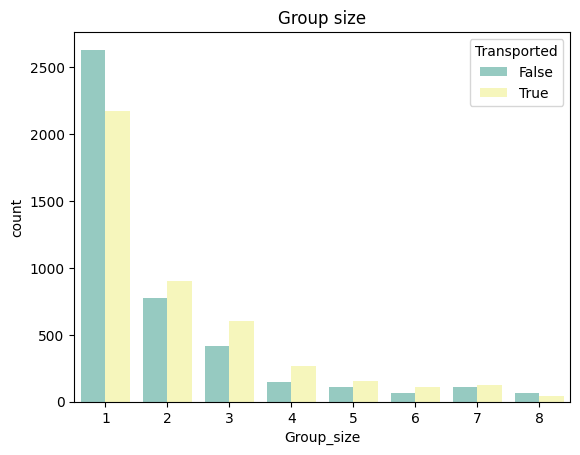

In [63]:
train_set['Group'] = train_set['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train_set['Group_size'] = train_set['Group'].map(lambda x: pd.concat([train_set['Group']]).value_counts()[x])

sns.countplot(data = train_set, x='Group_size', hue='Transported', palette="Set3")
plt.title('Group size')